# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [1]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [2]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

1. Memastikan jumlah data setiap label angka (0-9)

In [4]:
import numpy as np

# Mengambil label dan fitur dari dataset
X = mnist.data
y = mnist.target

# Menghitung jumlah data untuk setiap label
label_counts = np.bincount(y.astype(int))

# Menampilkan jumlah data untuk setiap label
for label, count in enumerate(label_counts):
    print(f"Label {label}: {count} data")

Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


Penjelasan:

Jika melihat data dari sampel paling terbanyak yaitu **Label 1** = 7877 data dan sampel terrendah yaitu **Label 5** = 6313 data, dimana data hanya memiliki sedikit perbedaan sehingga, mungkin bisa dikatakan bahwa data MNIST tidak imbalance.

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya

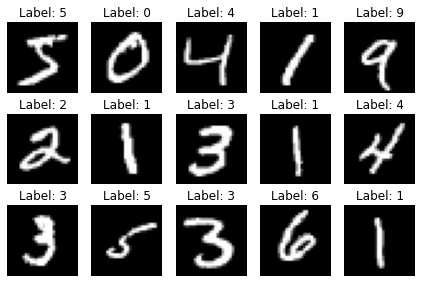

In [5]:
import matplotlib.pyplot as plt

#Konversi X menjadi array NumPy
X = X.values

# Menampilkan 15 gambar pertama dengan labelnya
fig, axes = plt.subplots(3, 5)
for i, ax in enumerate(axes.flat):
    img = X[i].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

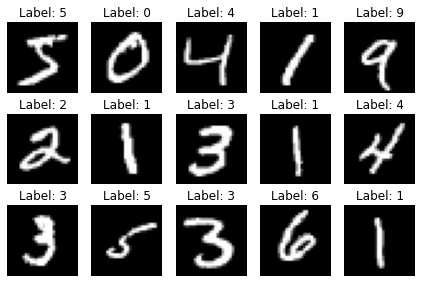

In [6]:
import matplotlib.pyplot as plt

# Menampilkan 15 gambar pertama dengan labelnya
fig, axes = plt.subplots(3, 5)
for i, ax in enumerate(axes.flat):
    ax.imshow(mnist.data.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {mnist.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

3. Ekstraksi fitur pada data MNIST

- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
- Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

a. Menggunakan Nilai Asli Pixel sebagai Fitur

dapat menggunakan nilai asli dari citra (nilai piksel) sebagai fitur. Setiap citra dalam dataset MNIST adalah gambar grayscale dengan resolusi 28x28 piksel, jadi setiap citra akan memiliki 28 * 28 = 784 fitur, masing-masing merepresentasikan tingkat kecerahan (0-255) dari setiap piksel. Berikut adalah contoh bagaimana dapat menggunakan nilai asli piksel sebagai fitur

In [7]:
# a. Menggunakan Nilai Asli (Raw Pixel Values) sebagai Fitur

X_raw = X  # Menggunakan nilai asli (raw pixel values) sebagai fitur

Dengan kode di atas, X_raw akan berisi nilai piksel asli dari setiap citra sebagai fitur.

b. Ekstraksi Fitur Menggunakan PCA

Anda juga dapat melakukan ekstraksi fitur menggunakan PCA. PCA adalah teknik untuk mengurangi dimensi data dengan memproyeksikan data ke ruang berdimensi lebih rendah. Dalam konteks MNIST, Anda dapat menggunakan PCA untuk mengurangi dimensi dari 784 fitur menjadi sejumlah komponen utama yang lebih kecil. Berikut adalah contoh bagaimana Anda dapat melakukan ekstraksi fitur menggunakan PCA

In [9]:
from sklearn.decomposition import PCA

# Menentukan jumlah komponen utama yang diinginkan
n_components = 85  # Misalnya, kita akan menggunakan 50 komponen utama

# Melakukan PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Sekarang, X_pca berisi data yang telah dikurangi dimensinya menggunakan PCA
print("Shape of X_pca:", X_pca.shape)

Shape of X_pca: (70000, 85)


4. Melakukan Data Training dan Data Testing menggunakan rasio 70:30, 80:20, 90:10

In [10]:
from sklearn.model_selection import train_test_split

# Bagi data PCA menjadi data training (70%) dan data testing (30%)
X_train_pca_70, X_test_pca_70, y_train_pca_70, y_test_pca_70 = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Bagi data PCA menjadi data training (80%) dan data testing (20%)
X_train_pca_80, X_test_pca_80, y_train_pca_80, y_test_pca_80 = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Bagi data PCA menjadi data training (90%) dan data testing (10%)
X_train_pca_90, X_test_pca_90, y_train_pca_90, y_test_pca_90 = train_test_split(X_pca, y, test_size=0.1, random_state=42)

In [11]:
# Jumlah data training dan data testing pada rasio 70:30
n_train_70 = len(X_train_pca_70)
n_test_70 = len(X_test_pca_70)

# Jumlah data training dan data testing pada rasio 80:20
n_train_80 = len(X_train_pca_80)
n_test_80 = len(X_test_pca_80)

# Jumlah data training dan data testing pada rasio 90:10
n_train_90 = len(X_train_pca_90)
n_test_90 = len(X_test_pca_90)

# Menampilkan jumlah data training dan data testing pada setiap rasio
print("Jumlah data training dan data testing (70:30):")
print("Data training: ", n_train_70)
print("Data testing: ", n_test_70)

print("\nJumlah data training dan data testing (80:20):")
print("Data training: ", n_train_80)
print("Data testing: ", n_test_80)

print("\nJumlah data training dan data testing (90:10):")
print("Data training: ", n_train_90)
print("Data testing: ", n_test_90)

Jumlah data training dan data testing (70:30):
Data training:  49000
Data testing:  21000

Jumlah data training dan data testing (80:20):
Data training:  56000
Data testing:  14000

Jumlah data training dan data testing (90:10):
Data training:  63000
Data testing:  7000


5. Melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.

- Diperbolehkan untuk melakukan tunning parameter.
- Diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM

**Naive Bayes**

(70:30)

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Inisialisasi model Naive Bayes
nb_model = GaussianNB()

# Latih model Naive Bayes pada data training (70:30)
nb_model.fit(X_train_pca_70, y_train_pca_70)

# Prediksi label untuk data training dan data testing
y_train_pred_nb_70 = nb_model.predict(X_train_pca_70)
y_test_pred_nb_70 = nb_model.predict(X_test_pca_70)

# Evaluasi performa model Naive Bayes
accuracy_train_nb_70 = accuracy_score(y_train_pca_70, y_train_pred_nb_70)
accuracy_test_nb_70 = accuracy_score(y_test_pca_70, y_test_pred_nb_70)

print("Akurasi Naive Bayes pada Data Training (70:30):", accuracy_train_nb_70)
print("Akurasi Naive Bayes pada Data Testing (70:30):", accuracy_test_nb_70)

Akurasi Naive Bayes pada Data Training (70:30): 0.8723469387755102
Akurasi Naive Bayes pada Data Testing (70:30): 0.8715238095238095


(80:20)

In [13]:
# Inisialisasi model Naive Bayes
nb_model = GaussianNB()

# Latih model Naive Bayes pada data training (80:20)
nb_model.fit(X_train_pca_80, y_train_pca_80)

# Prediksi label untuk data training dan data testing
y_train_pred_nb_80 = nb_model.predict(X_train_pca_80)
y_test_pred_nb_80 = nb_model.predict(X_test_pca_80)

# Evaluasi performa model Naive Bayes
accuracy_train_nb_80 = accuracy_score(y_train_pca_80, y_train_pred_nb_80)
accuracy_test_nb_80 = accuracy_score(y_test_pca_80, y_test_pred_nb_80)

print("Akurasi Naive Bayes pada Data Training (80:20):", accuracy_train_nb_80)
print("Akurasi Naive Bayes pada Data Testing (80:20):", accuracy_test_nb_80)

Akurasi Naive Bayes pada Data Training (80:20): 0.8723928571428572
Akurasi Naive Bayes pada Data Testing (80:20): 0.8721428571428571


(90:10)

In [14]:
# Inisialisasi model Naive Bayes
nb_model = GaussianNB()

# Latih model Naive Bayes pada data training (90:10)
nb_model.fit(X_train_pca_90, y_train_pca_90)

# Prediksi label untuk data training dan data testing
y_train_pred_nb_90 = nb_model.predict(X_train_pca_90)
y_test_pred_nb_90 = nb_model.predict(X_test_pca_90)

# Evaluasi performa model Naive Bayes
accuracy_train_nb_90 = accuracy_score(y_train_pca_90, y_train_pred_nb_90)
accuracy_test_nb_90 = accuracy_score(y_test_pca_90, y_test_pred_nb_90)

print("Akurasi Naive Bayes pada Data Training (90:10):", accuracy_train_nb_90)
print("Akurasi Naive Bayes pada Data Testing (90:10):", accuracy_test_nb_90)

Akurasi Naive Bayes pada Data Training (90:10): 0.8730634920634921
Akurasi Naive Bayes pada Data Testing (90:10): 0.8714285714285714


**Klasifikasi SVM**

(70:30)

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Inisialisasi model SVM dengan kernel RBF
svm_rbf_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # 'scale' adalah pilihan yang umum untuk gamma

# Latih model SVM pada data training (70:30)
svm_rbf_model.fit(X_train_pca_70, y_train_pca_70)

# Prediksi label untuk data training dan data testing
y_train_pred_svm_rbf_70 = svm_rbf_model.predict(X_train_pca_70)
y_test_pred_svm_rbf_70 = svm_rbf_model.predict(X_test_pca_70)

# Evaluasi performa model SVM dengan kernel RBF
accuracy_train_svm_rbf_70 = accuracy_score(y_train_pca_70, y_train_pred_svm_rbf_70)
accuracy_test_svm_rbf_70 = accuracy_score(y_test_pca_70, y_test_pred_svm_rbf_70)

print("Akurasi SVM dengan kernel RBF pada Data Training (70:30):", accuracy_train_svm_rbf_70)
print("Akurasi SVM dengan kernel RBF pada Data Testing (70:30):", accuracy_test_svm_rbf_70)

Akurasi SVM dengan kernel RBF pada Data Training (70:30): 0.9925306122448979
Akurasi SVM dengan kernel RBF pada Data Testing (70:30): 0.9809523809523809


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Inisialisasi model SVM dengan kernel linear
svm_linear_model = SVC(kernel='linear', C=1.0)

# Latih model SVM pada data training (70:30)
svm_linear_model.fit(X_train_pca_70, y_train_pca_70)

# Prediksi label untuk data training dan data testing
y_train_pred_svm_70 = svm_linear_model.predict(X_train_pca_70)
y_test_pred_svm_70 = svm_linear_model.predict(X_test_pca_70)

# Evaluasi performa model SVM
accuracy_train_svm_70 = accuracy_score(y_train_pca_70, y_train_pred_svm_70)
accuracy_test_svm_70 = accuracy_score(y_test_pca_70, y_test_pred_svm_70)

print("Akurasi SVM pada Data Training (70:30):", accuracy_train_svm_70)
print("Akurasi SVM pada Data Testing (70:30):", accuracy_test_svm_70)


(80:20)

In [17]:
# Inisialisasi model SVM dengan kernel RBF
svm_rbf_model_80 = SVC(kernel='rbf', C=1.0, gamma='scale')  # 'scale' adalah pilihan yang umum untuk gamma

# Latih model SVM pada data training (80:20)
svm_rbf_model_80.fit(X_train_pca_80, y_train_pca_80)

# Prediksi label untuk data training dan data testing
y_train_pred_svm_rbf_80 = svm_rbf_model_80.predict(X_train_pca_80)
y_test_pred_svm_rbf_80 = svm_rbf_model_80.predict(X_test_pca_80)

# Evaluasi performa model SVM dengan kernel RBF
accuracy_train_svm_rbf_80 = accuracy_score(y_train_pca_80, y_train_pred_svm_rbf_80)
accuracy_test_svm_rbf_80 = accuracy_score(y_test_pca_80, y_test_pred_svm_rbf_80)

print("Akurasi SVM dengan kernel RBF pada Data Training (80:20):", accuracy_train_svm_rbf_80)
print("Akurasi SVM dengan kernel RBF pada Data Testing (80:20):", accuracy_test_svm_rbf_80)


Akurasi SVM dengan kernel RBF pada Data Training (80:20): 0.9927857142857143
Akurasi SVM dengan kernel RBF pada Data Testing (80:20): 0.981


In [ ]:
# Inisialisasi model SVM dengan kernel linear
svm_linear_model = SVC(kernel='linear', C=1.0)

# Latih model SVM pada data training (80:20)
svm_linear_model.fit(X_train_pca_80, y_train_pca_80)

# Prediksi label untuk data training dan data testing
y_train_pred_svm_80 = svm_linear_model.predict(X_train_pca_80)
y_test_pred_svm_80 = svm_linear_model.predict(X_test_pca_80)

# Evaluasi performa model SVM
accuracy_train_svm_80 = accuracy_score(y_train_pca_80, y_train_pred_svm_80)
accuracy_test_svm_80 = accuracy_score(y_test_pca_80, y_test_pred_svm_80)

print("Akurasi SVM pada Data Training (80:20):", accuracy_train_svm_80)
print("Akurasi SVM pada Data Testing (80:20):", accuracy_test_svm_80)

(90:10)

In [18]:
# Inisialisasi model SVM dengan kernel RBF
svm_rbf_model_90 = SVC(kernel='rbf', C=1.0, gamma='scale')  # 'scale' adalah pilihan yang umum untuk gamma

# Latih model SVM pada data training (90:10)
svm_rbf_model_90.fit(X_train_pca_90, y_train_pca_90)

# Prediksi label untuk data training dan data testing
y_train_pred_svm_rbf_90 = svm_rbf_model_90.predict(X_train_pca_90)
y_test_pred_svm_rbf_90 = svm_rbf_model_90.predict(X_test_pca_90)

# Evaluasi performa model SVM dengan kernel RBF
accuracy_train_svm_rbf_90 = accuracy_score(y_train_pca_90, y_train_pred_svm_rbf_90)
accuracy_test_svm_rbf_90 = accuracy_score(y_test_pca_90, y_test_pred_svm_rbf_90)

print("Akurasi SVM dengan kernel RBF pada Data Training (90:10):", accuracy_train_svm_rbf_90)
print("Akurasi SVM dengan kernel RBF pada Data Testing (90:10):", accuracy_test_svm_rbf_90)


Akurasi SVM dengan kernel RBF pada Data Training (90:10): 0.9929206349206349
Akurasi SVM dengan kernel RBF pada Data Testing (90:10): 0.9802857142857143


In [ ]:
# Inisialisasi model SVM dengan kernel linear
svm_linear_model = SVC(kernel='linear', C=1.0)

# Latih model SVM pada data training (90:10)
svm_linear_model.fit(X_train_pca_90, y_train_pca_90)

# Prediksi label untuk data training dan data testing
y_train_pred_svm_90 = svm_linear_model.predict(X_train_pca_90)
y_test_pred_svm_90 = svm_linear_model.predict(X_test_pca_90)

# Evaluasi performa model SVM
accuracy_train_svm_90 = accuracy_score(y_train_pca_90, y_train_pred_svm_90)
accuracy_test_svm_90 = accuracy_score(y_test_pca_90, y_test_pred_svm_90)

print("Akurasi SVM pada Data Training (90:10):", accuracy_train_svm_90)
print("Akurasi SVM pada Data Testing (90:10):", accuracy_test_svm_90)

5. Lakukab evaluasi model yang Anda buat terhadap data training dan data testing.

- Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
- Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
- Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan

70:30

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluasi model SVM dengan kernel RBF pada Data Training (70:30)
print("Evaluasi Model pada Data Training (70:30):")
print("Akurasi pada Data Training (70:30):", accuracy_train_svm_rbf_70)
print(classification_report(y_train_pca_70, y_train_pred_svm_rbf_70))
print("Confusion Matrix pada Data Training (70:30):")
print(confusion_matrix(y_train_pca_70, y_train_pred_svm_rbf_70))

# Evaluasi model SVM dengan kernel RBF pada Data Testing (70:30)
print("\nEvaluasi Model pada Data Testing (70:30):")
print("Akurasi pada Data Testing (70:30):", accuracy_test_svm_rbf_70)
print(classification_report(y_test_pca_70, y_test_pred_svm_rbf_70))
print("Confusion Matrix pada Data Testing (70:30):")
print(confusion_matrix(y_test_pca_70, y_test_pred_svm_rbf_70))

Evaluasi Model pada Data Training (70:30):
Akurasi pada Data Training (70:30): 0.9983673469387755
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4845
           1       1.00      1.00      1.00      5513
           2       1.00      1.00      1.00      4857
           3       1.00      1.00      1.00      4965
           4       1.00      1.00      1.00      4888
           5       1.00      1.00      1.00      4398
           6       1.00      1.00      1.00      4788
           7       1.00      1.00      1.00      5045
           8       1.00      1.00      1.00      4833
           9       1.00      1.00      1.00      4868

    accuracy                           1.00     49000
   macro avg       1.00      1.00      1.00     49000
weighted avg       1.00      1.00      1.00     49000

Confusion Matrix pada Data Training (70:30):
[[4844    0    0    0    0    0    1    0    0    0]
 [   0 5509    0    0    0    0    0    4    

80:20

In [26]:
# Evaluasi model SVM dengan kernel RBF pada Data Training (80:20)
print("Evaluasi Model pada Data Training (80:20):")
print("Akurasi pada Data Training (80:20):", accuracy_train_svm_rbf_80)
print(classification_report(y_train_pca_80, y_train_pred_svm_rbf_80))
print("Confusion Matrix pada Data Training (80:20):")
print(confusion_matrix(y_train_pca_80, y_train_pred_svm_rbf_80))

# Evaluasi model SVM dengan kernel RBF pada Data Testing (80:20)
print("\nEvaluasi Model pada Data Testing (80:20):")
print("Akurasi pada Data Testing (80:20):", accuracy_test_svm_rbf_80)
print(classification_report(y_test_pca_80, y_test_pred_svm_rbf_80))
print("Confusion Matrix pada Data Testing (80:20):")
print(confusion_matrix(y_test_pca_80, y_test_pred_svm_rbf_80))

Evaluasi Model pada Data Training (80:20):
Akurasi pada Data Training (80:20): 0.9927857142857143
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5560
           1       0.99      1.00      0.99      6277
           2       0.99      0.99      0.99      5610
           3       1.00      0.99      0.99      5708
           4       0.99      0.99      0.99      5529
           5       0.99      0.99      0.99      5040
           6       1.00      1.00      1.00      5480
           7       0.99      0.99      0.99      5790
           8       1.00      0.99      0.99      5468
           9       0.99      0.99      0.99      5538

    accuracy                           0.99     56000
   macro avg       0.99      0.99      0.99     56000
weighted avg       0.99      0.99      0.99     56000

Confusion Matrix pada Data Training (80:20):
[[5547    1    0    1    2    2    3    0    1    3]
 [   1 6253   10    0    1    0    1    8    

90:10

In [27]:
# Evaluasi model SVM dengan kernel RBF pada Data Training (90:10)
print("Evaluasi Model pada Data Training (90:10):")
print("Akurasi pada Data Training (90:10):", accuracy_train_svm_rbf_90)
print(classification_report(y_train_pca_90, y_train_pred_svm_rbf_90))
print("Confusion Matrix pada Data Training (90:10):")
print(confusion_matrix(y_train_pca_90, y_train_pred_svm_rbf_90))

# Evaluasi model SVM dengan kernel RBF pada Data Testing (90:10)
print("\nEvaluasi Model pada Data Testing (90:10):")
print("Akurasi pada Data Testing (90:10):", accuracy_test_svm_rbf_90)
print(classification_report(y_test_pca_90, y_test_pred_svm_rbf_90))
print("Confusion Matrix pada Data Testing (90:10):")
print(confusion_matrix(y_test_pca_90, y_test_pred_svm_rbf_90))


Evaluasi Model pada Data Training (90:10):
Akurasi pada Data Training (90:10): 0.9929206349206349
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6220
           1       0.99      1.00      0.99      7077
           2       0.99      0.99      0.99      6316
           3       1.00      0.99      0.99      6381
           4       0.99      0.99      0.99      6213
           5       0.99      0.99      0.99      5655
           6       0.99      1.00      1.00      6199
           7       0.99      0.99      0.99      6569
           8       0.99      0.99      0.99      6132
           9       0.99      0.99      0.99      6238

    accuracy                           0.99     63000
   macro avg       0.99      0.99      0.99     63000
weighted avg       0.99      0.99      0.99     63000

Confusion Matrix pada Data Training (90:10):
[[6203    1    1    1    3    2    4    1    1    3]
 [   1 7050    8    0    1    1    1   10    

7. Menampilkan citra data testing berserta hasil pelabelannya

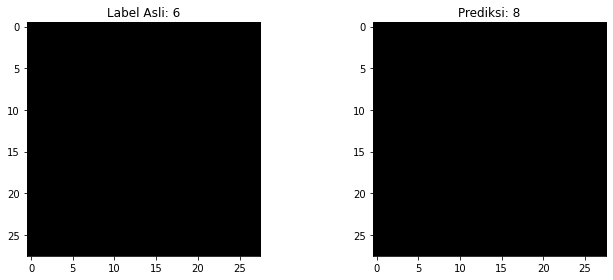

KeyError: 19608

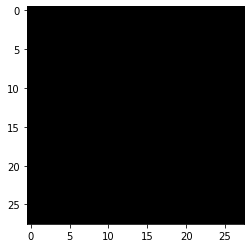

In [37]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Pilih beberapa contoh secara acak
num_samples = 5
sample_indices = random.sample(range(len(X_test_pca_70)), num_samples)

# Loop melalui contoh yang dipilih
for idx in sample_indices:
    # Periksa bentuk citra dan ubah ukuran jika diperlukan
    image = X_test_pca_70[idx]
    if image.shape != (28, 28):
        # Jika ukuran tidak sesuai, ganti dengan citra nol (citra hitam)
        image = np.zeros((28, 28))  # Anda bisa mengganti ini dengan citra lain jika ada
        
    predicted_label = y_test_pred_svm_rbf_70[idx]
    
    # Buat subplot dengan 2 kolom dan 1 baris
    plt.figure(figsize=(10, 4))
    
    # Subplot 1: Citra Asli
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label Asli: {y_test_pca_70[idx]}', fontsize=12)
    
    # Subplot 2: Hasil Prediksi
    plt.subplot(1, 2, 2)
    plt.imshow(image, cmap='gray')
    plt.title(f'Prediksi: {predicted_label}', fontsize=12)
    
    plt.tight_layout()
    plt.show()

In [30]:
import matplotlib.pyplot as plt
import random

# Pilih beberapa contoh secara acak
sample_indices = random.sample(range(len(X_test_pca_70)), 5)

# Loop melalui contoh yang dipilih
for idx in sample_indices:
    # Citra asli
    image = X_test_pca_70.iloc[idx].values.reshape(28, 28)  # Ubah ukuran citra sesuai dengan data aslinya
    plt.figure(figsize=(2, 2))
    plt.imshow(image, cmap='gray')
    plt.title(f'Label Asli: {y_test_pca_70[idx]}, Prediksi: {y_test_pred_svm_rbf_70[idx]}')
    plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

ValueError: cannot reshape array of size 85 into shape (9)

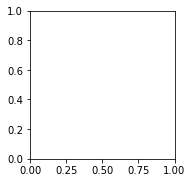

In [28]:
import matplotlib.pyplot as plt

# Ambil contoh citra dari data testing (misalnya, 10 citra)
sample_indices = [0, 1, 2, 3, 5, 8, 9]  # Ganti dengan indeks citra yang ingin ditampilkan
sample_images = X_test_pca_70[sample_indices]
sample_labels = y_test_pca_70.iloc[sample_indices]
predicted_labels = y_test_pred_svm_rbf_70[sample_indices]  # Hasil prediksi label dari model

# Gantilah 'ukuran_citra' dengan ukuran citra yang sesungguhnya (misalnya, (28, 28) untuk citra 28x28 pixel)
ukuran_citra = (28, 28)  # Gantilah dengan ukuran yang sesuai dengan data Anda

# Fungsi untuk menampilkan citra dan hasil labelnya
def show_images_with_labels(images, true_labels, predicted_labels):
    num_samples = len(images)
    num_cols = 5
    num_rows = (num_samples + num_cols - 1) // num_cols

    plt.figure(figsize=(15, 3 * num_rows))

    for i in range(num_samples):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i].reshape(-1, int(np.sqrt(images.shape[1]))), cmap='gray')
        true_label_str = str(true_labels[i]) if isinstance(true_labels[i], (int, str)) else "N/A"
        predicted_label_str = str(predicted_labels[i]) if isinstance(predicted_labels[i], (int, str)) else "N/A"
        plt.title(f'Asli: {true_label_str}\nPrediksi: {predicted_label_str}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Tampilkan citra dan hasil labelnya
show_images_with_labels(sample_images, sample_labels, predicted_labels)